# Scores Statistics

In [8]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt

In [9]:
path2csv = 'log_scores.csv'

try:
    csv_file = open(path2csv)
except IOError: 
    print(f'The file {path2csv} does not exist or is not readable. Please verify the path.')
    
   

reader = csv.DictReader(csv_file)

acc_score = []
peak_score = []
hf_score = []
for line in reader:
    acc_score.append(float(line['Acc score']))
    peak_score.append(float(line['Peak score']))
    hf_score.append(float(line['HF score']))


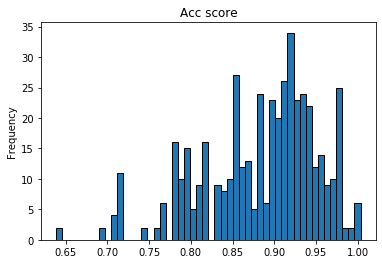

In [16]:
plt.figure()
pdrpm = pd.Series(acc_score)
hist = pdrpm.plot(kind='hist',density=False,bins=50,edgecolor='k',title='Acc score')

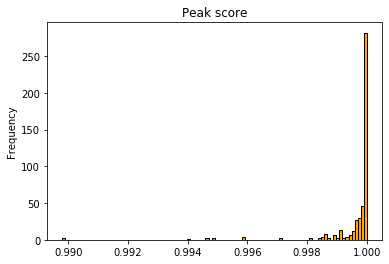

In [22]:
plt.figure()
pdrpm = pd.Series(peak_score)
hist = pdrpm.plot(kind='hist',density=False,bins=100,edgecolor='k',color='orange',title='Peak score')

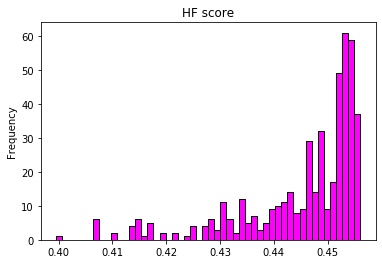

In [21]:
plt.figure()
pdrpm = pd.Series(hf_score)
hist = pdrpm.plot(kind='hist',density=False,bins=50,edgecolor='k',color='#FF00FF',title='HF score')

In [ ]:
color_list = []
for k in range(len(rpm_bins)):
    if k == bin_index :
        color_list.append('r')
    else :
        color_list.append('None')

plt.figure()
pdrpm = pd.Series(rpm)
hist = pdrpm.plot(kind='hist', bins=rpm_bins,edgecolor='k')
hist.patches[bin_index].set_facecolor('r') # the bin in which the current file average falls is highlighted